# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [55]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [56]:
df.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20632,8,6700000.0,43.0,2017-06-23T00:00:00,1,3.0,5.0,22.0,4,NaN,...,15.0,NaN,Санкт-Петербург,25567.0,6370.0,1.0,545.0,1.0,899.0,441.0
1702,11,2800000.0,51.4,2018-12-18T00:00:00,2,2.5,5.0,29.3,4,NaN,...,8.2,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,55.0
22694,14,3100000.0,32.6,2018-11-16T00:00:00,1,NaN,19.0,16.4,7,NaN,...,8.3,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,38.0
11590,20,5250000.0,64.0,2019-03-15T00:00:00,3,2.5,9.0,41.0,7,NaN,...,10.0,NaN,Колпино,25454.0,31240.0,0.0,NaN,0.0,NaN,NaN
17233,11,4300000.0,42.0,2018-03-30T00:00:00,1,NaN,16.0,24.2,14,NaN,...,9.1,2.0,Санкт-Петербург,18551.0,21976.0,0.0,NaN,0.0,NaN,63.0


In [58]:
print(df.size)
df.info(memory_usage='deep') # получение общей информации по таблице df

521378
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

In [59]:
df.describe().T # получение общей статистики по таблице df

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В таблице 22 столбца:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Вывод**

При просмотре данных о таблице мы видим, что в 14 из 22 столбцов есть пропущенные значения, разберемся в причине их появления и исправим. 

Так же необходимо привести данные в столбцах к нормальному виду, а именно:
- **first_day_exposition**(дата публикации) - исправить на формат datetime;
- исправить большое значение в **ceiling_height**(высота потолков);
- исправить значения на целочисленное в столбцах: **balcony**, **parks_around3000**, **ponds_around3000** и **days_exposition**;
- в столбцах с расстояниями до: центра города, аэропорта, парка, водоёма перевести в км 
- проверить нет ли сдвоенных значений в столбце **locality_name**

## Предобработка данных

Посмотрим количество пропущенных значений в столбце, от меньшего к большему

In [60]:
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Исправим следующие недочеты: 
- Отсутствующие значения в столбце **is_apartment** заменим на False, из тех же соображений, что за ненадобностью данные в объявлении и не указывали.
- Предположим, что значения в столбцах: **parks_around3000**, **ponds_around3000**, и **balcony** пропущенны потому что не были указаны при заполнении объявления на продажу квартиры. Скорее всего они просто отсутствуют. Считаю, что можно заменить на 0.
- Пропущенные значения в **locality_name** удалим вместе со строкой. Пользователь не нашёл бы данное объявление, т.к. оно не сможет попасть ему в рекомендации из-за отсутствия адреса. Данных пропусков немного, их отсутствие не сильно повлияют на результат исследования. 
- В столбце **ceiling_height** много пропущенных значений, заменим их медианным. Так же проверим данные по высоте.
- Остальные пропуски в столбцах оставим без изменений, будем иметь их в виду.



In [61]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('uint8')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('uint8')
df['balcony'] = df['balcony'].fillna(0).astype('uint8')
df['is_apartment'] = df['is_apartment'].fillna(False) 
df['floors_total'] = df['floors_total'].fillna(1).astype('uint8')
df['total_images'] = df['total_images'].fillna(0).astype('uint8')

In [62]:
print(df.size)
df.info(memory_usage='deep')

521378
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null uint8
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null uint8
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null uint8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null uint8
parks_nearest           8079 non-null float64
ponds_around300

In [63]:
df = df.dropna(subset = ['locality_name'])
df['locality_name'].unique()

# Всего 364 значения, дублей не видно, но в глаза бросается чередование через е\ё 
# Заменим, что бы избежать повторений
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [64]:
len(df['locality_name'].unique().tolist())

330

Что бы избежать повторений/путаницы с одинаковыми названиями населённых пунктов, будь то деревня или село, уберём приписки с видом населённого пункта.

In [65]:
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('село ', '')
df['locality_name'] = df['locality_name'].str.replace('городского типа ', '')

In [66]:
len(df['locality_name'].unique().tolist())

319

In [67]:
len(df['locality_name'].unique()) # Избавились от 34 повторов 
df['locality_name'].isna().sum()

0

In [68]:
#df['ceiling_height'].unique() #Посмотрим какие значения встречаются в столбце

Высота потолков от 10 до 100 явно некорректная, если речь идет о продаже жилых квартир. 
Для реалистичных данных возьмем максимально допустимую высоту в апартаментах (которые делают двухэтажными), т.е. 5 метров, всё что больше в этом столбце заменим на медианное значение.

Так же не реалистичная минимальная высота потолков в 1м. Минимально допустимая высота -  2.4м. Что бы убрать неправдоподобные значений установим фильтр до 2.2м т.е. с запасом, т.к. жильцы при ремонте\отделке потолка могли занизить его высоту.

In [69]:
df.loc[df['ceiling_height']<2.2] = df['ceiling_height'].median()
df.loc[df['ceiling_height']>=5] = df['ceiling_height'].median()
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

In [70]:
df['ceiling_height'].isnull().sum() # Проверяем

0

In [71]:
# Для удобства переведем значения в км в столбцах :
df['airports_nearest'] = df['airports_nearest'] / 1000
df['cityCenters_nearest'] = df['cityCenters_nearest'] / 1000
df['parks_nearest'] = df['parks_nearest'] / 1000
df['ponds_nearest'] = df['ponds_nearest'] / 1000

# И переименуем
df = df.rename(columns={'airports_nearest':'airports_nearest_km'})
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest_km'})
df = df.rename(columns={'parks_nearest':'parks_nearest_km'})
df = df.rename(columns={'ponds_nearest':'ponds_nearest_km'})

In [72]:
# Приведём к нужному формату datetime столбец 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [73]:
# Дубликатов 36
df.duplicated().sum()

# Удаляем дубликаты
df = df.drop_duplicates().reset_index(drop= True)

# Проверяем
df.duplicated().sum()

0

In [74]:
df.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest_km,city_centers_nearest_km,parks_around3000,parks_nearest_km,ponds_around3000,ponds_nearest_km,days_exposition
0,20.0,13000000.0,108.00,2019-03-07,3.0,2.70,16.0,51.00,8.0,False,...,25.00,0.0,Санкт-Петербург,18.863,16.028,1.0,0.482,2.0,0.755,NaN
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.60,1.0,False,...,11.00,2.0,Шушары,12.817,18.603,0.0,NaN,0.0,NaN,81.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.30,4.0,False,...,8.30,0.0,Санкт-Петербург,21.741,13.933,1.0,0.090,2.0,0.574,558.0
3,0.0,64900000.0,159.00,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,NaN,0.0,Санкт-Петербург,28.098,6.800,2.0,0.084,3.0,0.234,424.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.00,13.0,False,...,41.00,0.0,Санкт-Петербург,31.856,8.098,2.0,0.112,1.0,0.048,121.0
5,10.0,2890000.0,30.40,2018-09-10,1.0,2.65,12.0,14.40,5.0,False,...,9.10,0.0,городской Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6.0,3700000.0,37.30,2017-11-02,1.0,2.65,26.0,10.60,6.0,False,...,14.40,1.0,Парголово,52.996,19.143,0.0,NaN,0.0,NaN,155.0
7,5.0,7915000.0,71.60,2019-04-18,2.0,2.65,24.0,NaN,22.0,False,...,18.90,2.0,Санкт-Петербург,23.982,11.634,0.0,NaN,0.0,NaN,NaN
8,20.0,2900000.0,33.16,2018-05-23,1.0,2.65,27.0,15.43,26.0,False,...,8.81,0.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18.0,5400000.0,61.00,2017-02-26,3.0,2.50,9.0,43.60,7.0,False,...,6.50,2.0,Санкт-Петербург,50.898,15.008,0.0,NaN,0.0,NaN,289.0


## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:

1. Цену квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [75]:
# 1. Добавим столбец с ценой за квадратный метр, сразу перевести в целочисленный тип
df['price_sm'] = df['last_price']/df['total_area']
df['price_sm'] = df['price_sm'].astype('int8')

In [76]:
# 2. Добавим в таблицу столбцы с днём недели, месяцем и годом публикации объявления
df['weekday_publication'] = df['first_day_exposition'].dt.weekday
df['month_publication'] = df['first_day_exposition'].dt.month
df['year_publication'] = df['first_day_exposition'].dt.year

In [77]:
# 3. Категризируем этажи
def floors_number(floor):
    if floor['floor'] == 1:
        return 'первый'
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    return 'другой'
df['floor_position'] = df.apply(floors_number, axis=1)

In [78]:
# 4.1. Добавим столбец с соотношением жилой и общей площади
df['ratio_s_living_to_total'] = df['living_area'] / df['total_area']
# 4.2. Добавим столбец с соотношение площади кухни к общей площади
df['ratio_s_kitchen_to_total'] = df['kitchen_area'] / df['total_area']
df.head(15) # Посмотрим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest_km,days_exposition,price_sm,weekday_publication,month_publication,year_publication,floor_position,ratio_s_living_to_total,ratio_s_kitchen_to_total
0,20.0,13000000.0,108.00,2019-03-07,3.0,2.70,16.0,51.00,8.0,False,...,2.0,0.755,NaN,50,3,3,2019,другой,0.472222,0.231481
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.60,1.0,False,...,0.0,NaN,81.0,-24,1,12,2018,первый,0.460396,0.272277
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.30,4.0,False,...,2.0,0.574,558.0,113,3,8,2015,другой,0.612500,0.148214
3,0.0,64900000.0,159.00,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,3.0,0.234,424.0,112,4,7,2015,другой,NaN,NaN
4,2.0,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.00,13.0,False,...,1.0,0.048,121.0,-96,1,6,2018,другой,0.320000,0.410000
5,10.0,2890000.0,30.40,2018-09-10,1.0,2.65,12.0,14.40,5.0,False,...,0.0,NaN,55.0,89,0,9,2018,другой,0.473684,0.299342
6,6.0,3700000.0,37.30,2017-11-02,1.0,2.65,26.0,10.60,6.0,False,...,0.0,NaN,155.0,123,3,11,2017,другой,0.284182,0.386059
7,5.0,7915000.0,71.60,2019-04-18,2.0,2.65,24.0,NaN,22.0,False,...,0.0,NaN,NaN,-48,3,4,2019,другой,NaN,0.263966
8,20.0,2900000.0,33.16,2018-05-23,1.0,2.65,27.0,15.43,26.0,False,...,0.0,NaN,189.0,-98,2,5,2018,другой,0.465320,0.265682
9,18.0,5400000.0,61.00,2017-02-26,3.0,2.50,9.0,43.60,7.0,False,...,0.0,NaN,289.0,-52,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

**4.1. Изучите следующие параметры:** 
- Площадь; 
- Цена; 
- Число комнат; 
- Высота потолков. 

Постройте гистограммы для каждого параметра.

count    23600.000000
mean        60.302513
std         35.542253
min          2.650000
25%         40.000000
50%         52.000000
75%         69.702500
max        900.000000
Name: total_area, dtype: float64

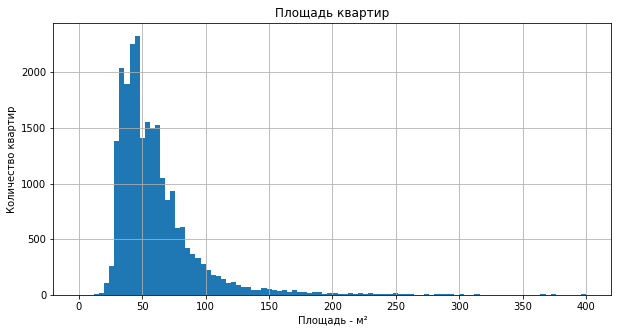

In [79]:
df.hist('total_area', bins=100, figsize = (10,5),range = (0,400))
plt.title('Площадь квартир')
plt.xlabel('Площадь - м²')
plt.ylabel('Количество квартир')
df['total_area'].describe()

# df.boxplot(column='total_area', figsize=(15,10),vert=False)

**Вывод:**
Больше всего объявлений выставляют с квартирами площадью 45-49 м². 

Единичные предложения на квартиры площадью от 200 и до 900 м².

count    2.360000e+04
mean     6.527861e+06
std      1.082476e+07
min      2.650000e+00
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

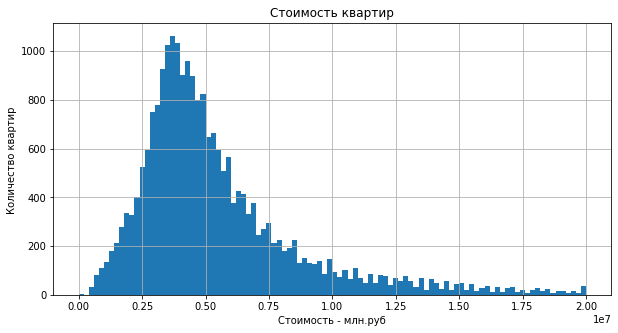

In [80]:
df.hist('last_price', bins = 100, figsize = (10,5), range = (0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость - млн.руб')
plt.ylabel('Количество квартир ')
df['last_price'].describe()

# df.boxplot(column='last_price', figsize=(15,10),vert=False)

**Вывод:** Квартир стоимостью от 3,5 до 4,7 млн. руб. больше всего представлено на рынке, предложений от 10 млн. руб. гораздо меньше. 

Максимальное стоимость в объявлении 763 млн. руб.

In [81]:
# df['rooms'].value_counts()
df['rooms'].describe()

count    23600.000000
mean         2.070239
std          1.078255
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Встречается 195 квартир с 0 комнат, возможно это была ошибка при выгрузке или заполнении, для "правильности" заменим 0 на 1, т.к. этих значений больше всего

In [82]:
df['rooms'] = df['rooms'].replace(0, 1) # Сменим 0 комнат на 1
df['rooms'] = df['rooms'].astype('int8') # Сделаем целочисленным 

Text(0, 0.5, 'Количество квартир')

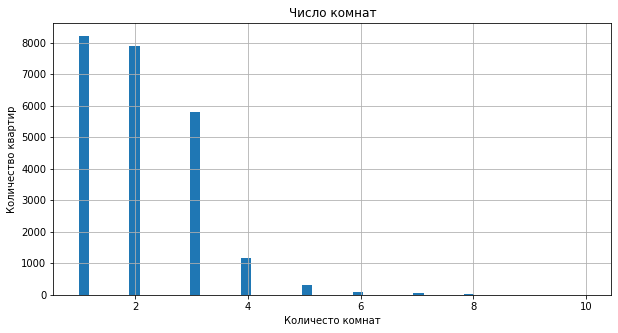

In [83]:
df.hist('rooms', bins = 50, figsize = (10,5), range = (1,10))
plt.title('Число комнат')
plt.xlabel('Количесто комнат')
plt.ylabel('Количество квартир')

**Вывод:** На рынке больше объявлений с 1,2 и 3 комнатами.

count    23600.000000
mean         2.696239
std          0.214588
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

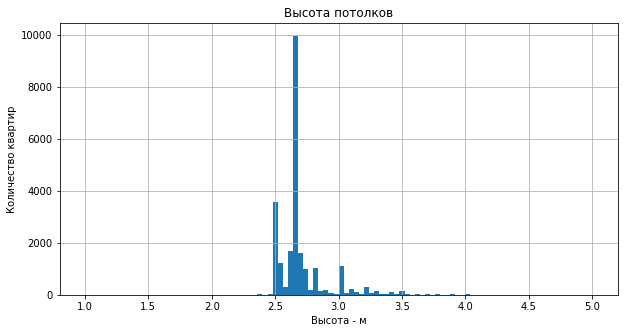

In [84]:
df.hist('ceiling_height', bins = 100, figsize = (10,5), range = (1,5))
plt.title('Высота потолков')
plt.xlabel('Высота - м')
plt.ylabel('Количество квартир')

df['ceiling_height'].describe()

**Вывод:** Квартиры с высотой потолков 2,5 - 2,7м чаще выставляют на продажу.

Высота потолков от 3м - редкость

**4.2. Изучите время продажи квартиры.**
- Постройте гистограмму. 
- Посчитайте среднее и медиану. 
- Опишите, сколько обычно занимает продажа. 
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [85]:
df['days_exposition'].describe() # Посмотрим статистику по дням размещения

count    20431.000000
mean       180.775569
std        219.838884
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение - 95 дней, среднее значение - 180 дней. 

Разница, почти в два раза, объясняется большим разбросом от 1 до 1580 дней размещения. 
В то время как нормальные значения на графике находятся от 1 до 450 дней, эта разница влияет на среднее значение, но не на медиану.

Text(0, 0.5, 'Количество объявлений')

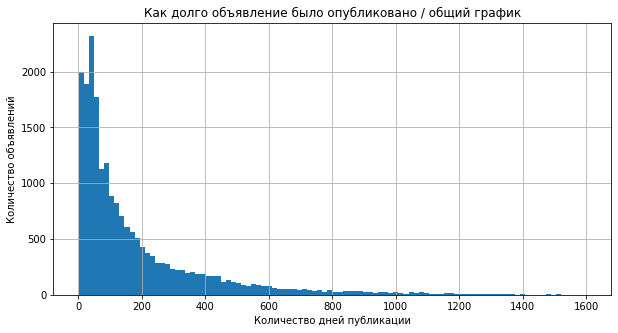

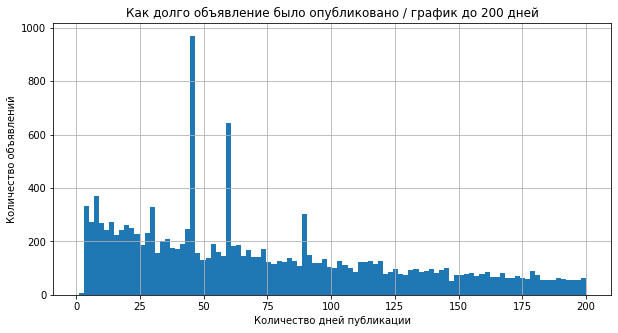

In [86]:
df.hist('days_exposition', figsize = (10,5), bins = 100, range = (1,1600))
plt.title('Как долго объявление было опубликовано / общий график')
plt.xlabel('Количество дней публикации')
plt.ylabel('Количество объявлений')

# Посмотрев общий график, понятно что больше всего значений в области до 200 дней, рассмотрим
df.hist('days_exposition', figsize = (10,5), bins = 100, range = (1,200))
plt.title('Как долго объявление было опубликовано / график до 200 дней')
plt.xlabel('Количество дней публикации')
plt.ylabel('Количество объявлений')

Так же видим, что пик по длительности приходится на +- 45, 60 и 90 дней. Подозрительно, что именно эти "круглые даты", сильно выбиваются из статистики. Решила перепроверить, на сайте яндекс.недвижимости, может есть какая-то зависимость. И как оказалось это даты автоматического снятия объявления с публикации. В зависимости от стоимости квартиры срок публикации может составлять как раз 45, 60 и 90 дней. Если в другие даты с большей вероятностью квартира была продана и объявление сняли за ненадобностью, то в конкретно в эти даты мы не можем быть уверенны, что сделка купли - продажи состоялась.

Но тем не менее, посмотрев на график, мы можем ответить на поставленные вопросы:

**Сколько обычно занимает продажа?**
- От 1 до 100 дней.

**Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**
- Если продажа прошла до 45 дней - сделка состоялась быстро.
- Долгая продажа - 230 дней и больше.

Максимальное количество дней публикации объявления - 1580

**4.3. Уберем редкие и выбивающиеся значения.**

Избавимся от объявлений размещённых длительностью: 45,60 и 90

In [87]:
df_new = df.query('days_exposition !=45 and days_exposition !=60 and days_exposition !=90')

Text(0, 0.5, 'Количество объявлений')

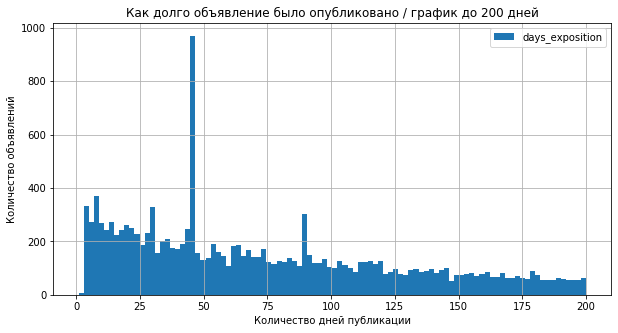

In [88]:
df_new.plot(y = 'days_exposition', kind = 'hist',grid = True, figsize = (10,5), bins = 100, range = (1,200))
plt.title('Как долго объявление было опубликовано / график до 200 дней')
plt.xlabel('Количество дней публикации')
plt.ylabel('Количество объявлений')

**4.4. Какие факторы больше всего влияют на стоимость квартиры?**

Изучите, зависит ли цена от:
1. Площади; 
2. Числа комнат; 
3. Удалённости от центра; 
4. На каком этаже расположена квартира: первом, последнем или другом. 

Также изучите зависимость от даты размещения: дня недели, месяца и года.

Корреляция цены от общей площади квартиры равна: 0.6521222920227238
Корреляция цены за м² от общей площади квартиры равна: 0.011911034722144184


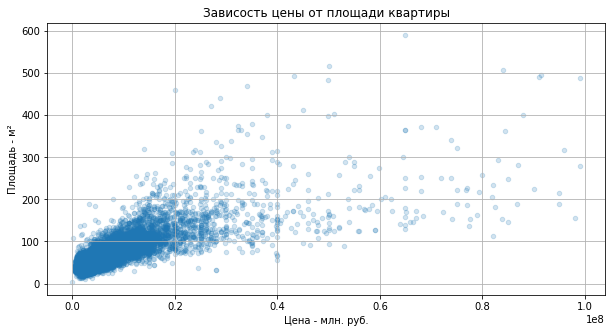

In [89]:
df.query('0 < last_price < 100000000').plot(x='last_price', y='total_area', kind='scatter', alpha=0.2, grid = True, figsize = (10,5))
plt.title('Зависость цены от площади квартиры')
plt.xlabel('Цена - млн. руб.')
plt.ylabel('Площадь - м²')

print('Корреляция цены от общей площади квартиры равна:', df['last_price'].corr(df['total_area']))
print('Корреляция цены за м² от общей площади квартиры равна:', df['price_sm'].corr(df['total_area']))

**Вывод:**
Коэффициент корреляции цены от общей площади квартиры - 0.78 - положительный. Чем больше площадь квартиры, тем больше её стоимость.
Коэффициент корреляции цены за м² от общей площади квартиры - 0.23 - зависимость маленькая. Цена за м² почти не увеличивается относительно площади. 

Корреляция цены от числа комнат равна: 0.36451447578751733
Корреляция цены за м² от числа комнат равна: 0.014068254948066574


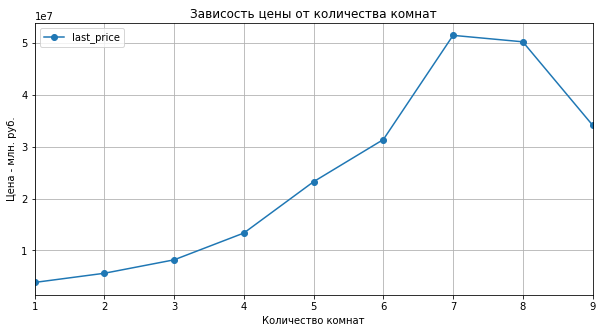

In [90]:
df.query('0 < rooms < 10').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена - млн. руб.')

print('Корреляция цены от числа комнат равна:', df['last_price'].corr(df['rooms']))
print('Корреляция цены за м² от числа комнат равна:', df['price_sm'].corr(df['rooms']))

**Вывод:** На графике видно, что цена увеличивается пропорционально числу комнат до 7. Далее идет на спад.
 Коэффициент корреляции больше у общей стоимости, чем у цены за м² - зависимости от числа комнат, почти нет.

Корреляция цены от от удалённости от центра равна: -0.2067192795648206
Корреляция цены за м² от удалённости от центра равна: -0.017359716162419853


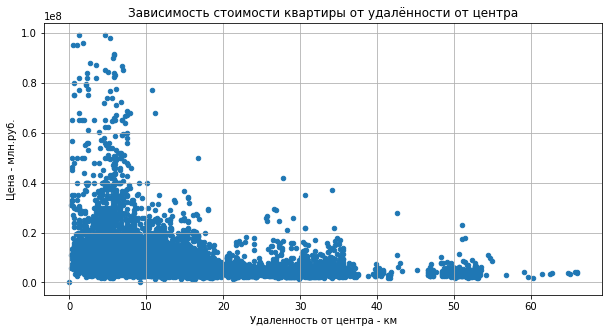

In [91]:
df.query('0 < last_price < 100000000').plot(x='city_centers_nearest_km', y='last_price', kind='scatter', grid = True, figsize=(10,5))
plt.title('Зависимость стоимости квартиры от удалённости от центра')
plt.xlabel('Удаленность от центра - км')
plt.ylabel('Цена - млн.руб.')

print('Корреляция цены от от удалённости от центра равна:', df['last_price'].corr(df['city_centers_nearest_km']))
print('Корреляция цены за м² от удалённости от центра равна:', df['price_sm'].corr(df['city_centers_nearest_km']))

**Вывод** Коэффициент корреляции отрицательный в обоих случаях, т.к. чем дальше  квартира от центра , тем ниже она в цене.

Так же в центра Питера встречаются недорогие варианты 

,median
floor_position,
другой,4850000.0
первый,3900000.0
последний,4300000.0


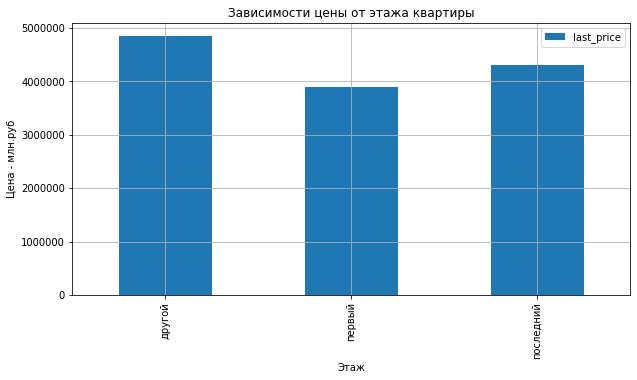

In [92]:
df.pivot_table(index='floor_position', values='last_price', aggfunc='median').plot(kind='bar', grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимости цены от этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Цена - млн.руб')

# Отобразим сводную таблицу по цене
df.pivot_table(index='floor_position', values='last_price', aggfunc={'median'})

**Вывод** В среднем квартиры на первом этаже дешевле остальных. 
Квартиры на не крайних этажах оцениваются дороже.

**Изучим зависимость от даты размещения: дня недели, месяца и года.**

                        median
weekday_publication           
0                    4650000.0
1                    4714595.0
2                    4700000.0
3                    4650000.0
4                    4577500.0
5                    4567500.0
6                    4550000.0


Text(0, 0.5, 'Цена - млн.руб')

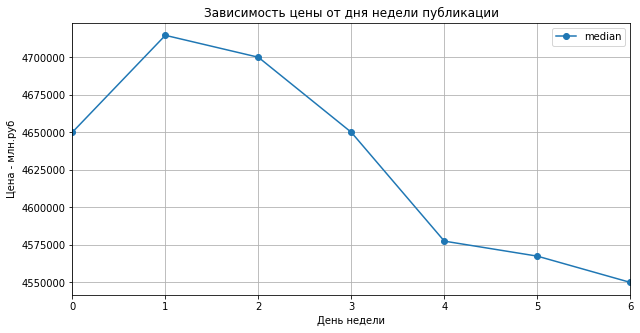

In [93]:
print(df.pivot_table(index='weekday_publication', values='last_price', aggfunc={'median'}))

df.pivot_table(index='weekday_publication', values='last_price', aggfunc={'median'}).plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость цены от дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Цена - млн.руб')

**Вывод** Объявления по дорогим квартирам чаще закрывают в рабочие дни. 

В основном сделки с недвижимостью проходят через банк (аренду ячейки), поэтому не удивительно, что большая часть приходится на рабочие дни. Суббота и воскресенье в отделениях часто - выходной день.

                      median
month_publication           
1                  4600000.0
2                  4650000.0
3                  4690000.0
4                  4800000.0
5                  4500000.0
6                  4400000.0
7                  4650000.0
8                  4570000.0
9                  4700000.0
10                 4572500.0
11                 4700000.0
12                 4700000.0


Text(0, 0.5, 'Цена - млн.руб')

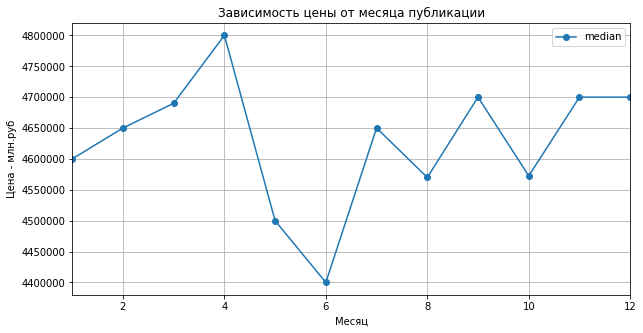

In [94]:
print(df.pivot_table(index='month_publication', values='last_price', aggfunc={'median'}))

df.pivot_table(index='month_publication', values='last_price', aggfunc={'median'}).plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена - млн.руб')

**Вывод** Пик по закрываемости приходится на апрель, в то время, как меньше всего сделок заключается в июне.
Рынок недвижимости сезонный, что подтверждается данным графиком. Спад в летние месяцы обусловливается сезоном отпусков.

                  last_price
year_publication            
2014               7640000.0
2015               5324000.0
2016               4540000.0
2017               4500000.0
2018               4550000.0
2019               5050000.0


Text(0, 0.5, 'Цена - млн.руб')

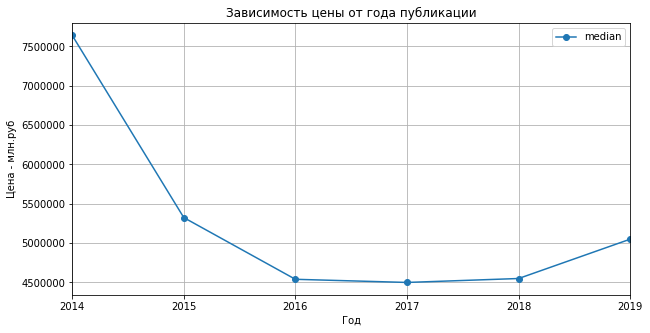

In [95]:
# Встречается только одно значение 1980г, возможно кто-то указал год рождения по ошибке, уберем его из графика 
df = df[df['year_publication'] > 1980] 

print(df.pivot_table(index='year_publication', values='last_price', aggfunc='median'))

(df
    .pivot_table(index='year_publication', values='last_price', aggfunc={'median'})
    .plot(grid=True, style='o-', figsize=(10, 5)))
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год')
plt.ylabel('Цена - млн.руб')

**Вывод** В 2014г цены на квартиры были высокие из-за валютного кризиса этого года. 
Резкое ослабление рубля, по отношению к иностранным валютам, повлияло и на рынок недвижимости. Строительство новых домов приостановилось, что создало дефицит на этот товар и соответственно цены начали расти.

Ситуация со строительством недвижимости начала стабилизироваться  к концу 2015г.
Мы видим спад цен с 2016-2018гг.

**5. Выберем 10 населённых пунктов с наибольшим числом объявлений.**

1. Посчитайте среднюю цену квадратного метра в этих населённых пунктах;
2. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 

In [96]:
df.pivot_table(index='locality_name',values='price_sm',aggfunc=('count','median')).sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15693.0,-3.0
Мурино,588.0,-7.0
Кудрово,471.0,-3.0
Шушары,440.0,-3.0
Всеволожск,397.0,2.0
Пушкин,369.0,-16.0
Колпино,338.0,-5.5
Парголово,327.0,7.0
Гатчина,306.0,3.0


**Вывод** 
1. В Санкт-Петербурге больше всего объявлений и самая большая стоимость за квадрат - 104 800 руб
2. В Выборге значительно меньше объявлений, но и стоимость за квадрат невысокая - 58 200 руб

**6. Определим, какая область входит в центр Санкт-Петербурга.**

Отфильтруем **locality_name** по Санкт-Петербургу, выведем среднюю цену за м² в зависимости от центра

Text(0, 0.5, 'Цена - млн. руб.')

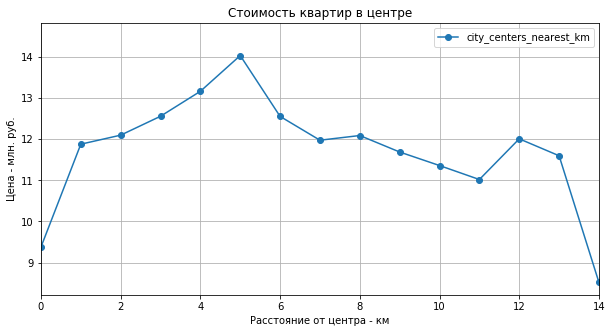

In [97]:
(df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index ='price_sm', values = 'city_centers_nearest_km', aggfunc = 'median')
    .plot(xlim=(0,14), grid=True, style='o-', figsize=(10,5)))
plt.title('Стоимость квартир в центре')
plt.xlabel('Расстояние от центра - км')
plt.ylabel('Цена - млн. руб.')

**Вывод**
Будем считать, что центр - это область до 8-9 км, т.к. после этой отметки мы видим однозначное снижение стоимости за м²

Пусть в районе 3км от центра есть первый спад в цене за м², предположу, что это Василеостровский район. В Питере он все-таки считается центральным, а так же "недорогим".

**7. Проанализируем центральный район и изучим следующие параметры:**
1. Площадь; 
2. Цена; 
3. Число комнат; 
4. Высота потолков. 

Зададим параметр для центра Санкт-Петербурга

In [107]:
len(df.query('locality_name == "Санкт-Петербург"' and 'city_centers_nearest_km <= 9'))

4369

Медианное значение площади в центре 75.0


Text(0, 0.5, 'Количество квартир')

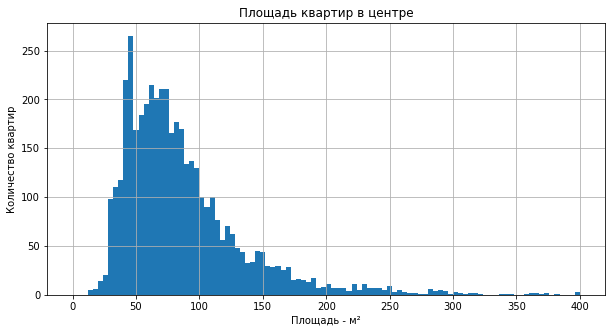

In [99]:
spb.hist('total_area', bins=100, figsize = (10,5), range = (0,400))
print('Медианное значение площади в центре', spb['total_area'].median().round(1))
plt.title('Площадь квартир в центре')
plt.xlabel('Площадь - м²')
plt.ylabel('Количество квартир')

**Вывод** Медианное значение площади квартир в центре чуть больше, чем общая по Питеру и области, но разница не критична.

В центре больше всего предложений с площадью 35м² и 45м²

Медианная цена в центре 8700000.0
Медианная цена за м² в центре 0.0


Text(0, 0.5, 'Количество квартир')

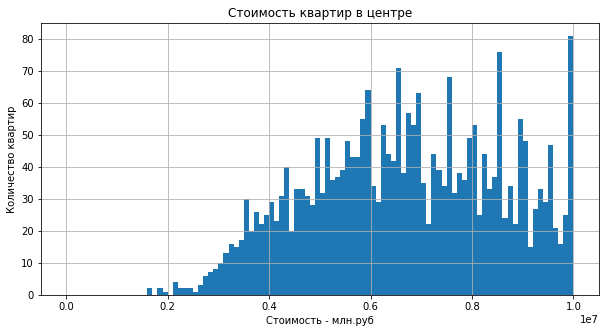

In [100]:
spb.hist('last_price', bins=100, figsize = (10,5), range = (0,10000000))
print('Медианная цена в центре', spb['last_price'].median().round(1))
print('Медианная цена за м² в центре', spb['price_sm'].median().round(1))
plt.title('Стоимость квартир в центре')
plt.xlabel('Стоимость - млн.руб')
plt.ylabel('Количество квартир')

**Вывод** В центре цена за квартиру явно дороже. Средняя цена за квартиру в центре - 8,7млн. руб, в то время как в Питере и области - 4,6 млн. руб. 

Разница в цене за м² так же есть составляет +-27 тыс.руб. В центре за за м² -  122тыс.рур, а в Питере и области 95тыс.руб

В центре много предложений от 4 млн. руб. 

Медианное количество комнат в центре 3.0
Медианное количество комнат в Питере и области 2.0


Text(0, 0.5, 'Количество квартир')

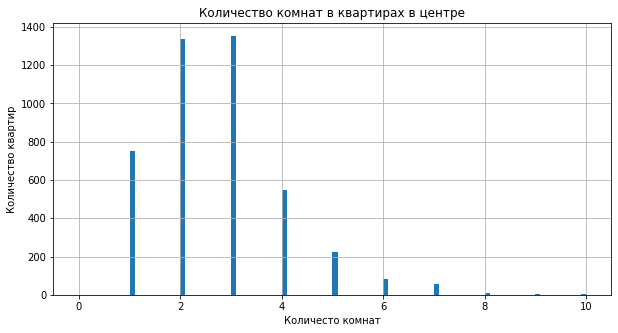

In [101]:
spb.hist('rooms', bins=100, figsize = (10,5), range = (0,10))
print('Медианное количество комнат в центре', spb['rooms'].median().round(1))
print('Медианное количество комнат в Питере и области', df['rooms'].median().round(1))
plt.title('Количество комнат в квартирах в центре')
plt.xlabel('Количесто комнат')
plt.ylabel('Количество квартир')

**Вывод** В центре больше предложений квартир с 2-3 комнатами. 
В то время, как по статистике Питера и области больше выкладывают объявления с 1-2 комнатами

Медианная высота потолков в центре 2.8
Медианная высота потолков в Питере и области 2.6


Text(0, 0.5, 'Количество квартир')

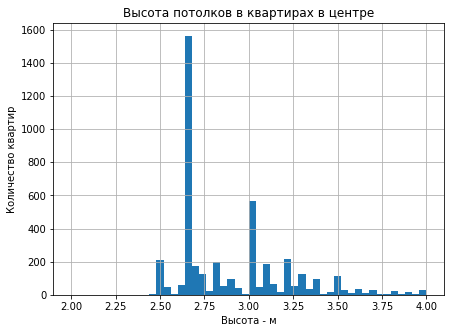

In [102]:
# 4. Сравним предложения по высоте потолков
spb.hist('ceiling_height', bins=50, figsize = (7,5), range = (2,4))
print('Медианная высота потолков в центре', spb['ceiling_height'].median().round(1))
print('Медианная высота потолков в Питере и области', df['ceiling_height'].median().round(1))
plt.title('Высота потолков в квартирах в центре')
plt.xlabel('Высота - м')
plt.ylabel('Количество квартир')

**Вывод** По высоте потолков разницы нет

_______________________________________________________________________________________________________________________________

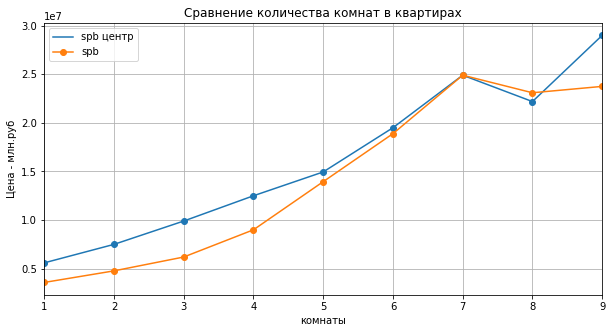

In [103]:
(spb
    .query('0 < rooms < 10')
    .groupby('rooms')['last_price'].median()
    .plot(x='rooms', y='last_price', style='o-',grid=True,figsize=(10,5),legend=True, label='spb центр'))
(df
    .query('0 < rooms < 10')
    .groupby('rooms')['last_price'].median()
    .plot(x='rooms', y='last_price', style='o-',grid=True,figsize=(10,5),legend=True, label='spb'))
Год

**Вывод** В центре ситуация с ростом цен пропорционально числу комнат такая же, как и в общих данных.
Но как и говорилось раньше, разница в цене в центре есть, и стоимость за комнату может быть больше на 500-700 тыс.руб

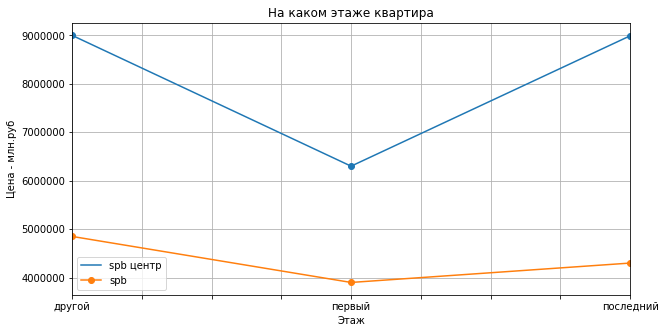

In [104]:
(spb
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position', y='last_price', style='o-',grid=True,figsize=(10,5),legend=True, label='spb центр'))
(df
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position', y='last_price', style='o-',grid=True,figsize=(10,5),legend=True, label='spb'))
plt.title('На каком этаже квартира')
plt.xlabel('Этаж')
plt.ylabel('Цена - млн.руб')
plt.show()

**Вывод** Первые этажи так же не популярны. Но последние этажи, относительно общих данных, пользуются спросом в центре на ровне с "другими".

В центре Санкт-Петербурга запрещено строить здания выше 22 метров, это примерно 5-7 этажей, наверное, поэтому так много предложений.

Text(0, 0.5, 'Стоимость - млн.руб')

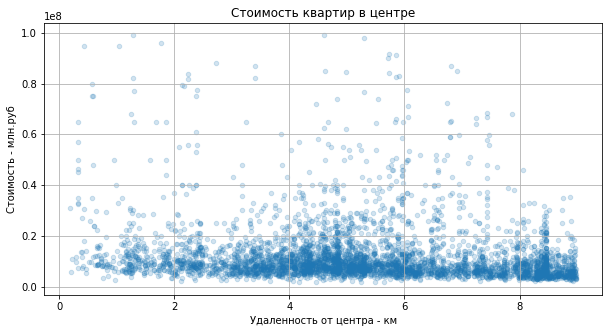

In [105]:
(spb
    .query('0 < last_price < 100000000')
    .plot(x='city_centers_nearest_km', y='last_price', kind='scatter',alpha=0.2, grid = True, figsize=(10,5)))
plt.title('Стоимость квартир в центре')
plt.xlabel('Удаленность от центра - км')
plt.ylabel('Стоимость - млн.руб')

**Вывод** Самые дорогие квартиры находятся в радиусе 8 км от центра. 
Больше всего предложений в 4-6 км от центра.

_______________________________________________________________________________________________________________________________

Text(0, 0.5, 'Цена - млн.руб')

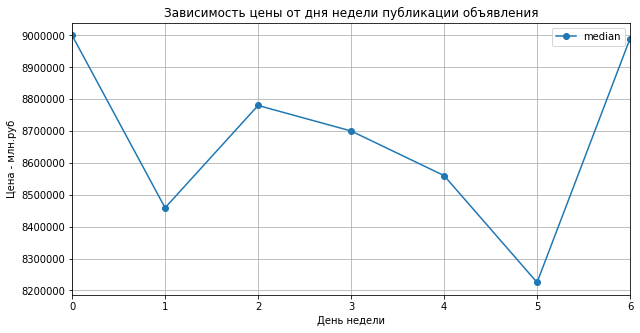

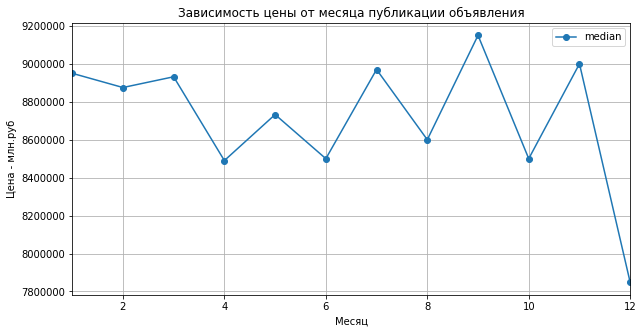

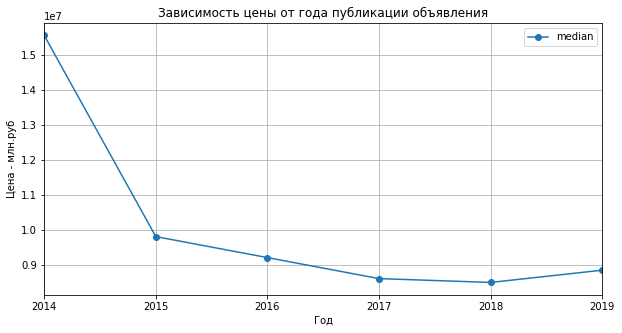

In [106]:
spb.pivot_table(index='weekday_publication', values='last_price', aggfunc={'median'}).plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость цены от дня недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Цена - млн.руб')

spb.pivot_table(index='month_publication', values='last_price', aggfunc={'median'}).plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость цены от месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена - млн.руб')

spb.pivot_table(index='year_publication', values='last_price', aggfunc={'median'}).plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость цены от года публикации объявления')
plt.xlabel('Год')
plt.ylabel('Цена - млн.руб')

## Общий вывод

**Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**
- Если продажа прошла до 45 дней - сделка состоялась быстро.
- Долгая сделка - 230 дней и больше.

**Какие факторы больше всего влияют на стоимость квартиры?**
- Чем больше площадь квартиры, тем больше её стоимость.
- Количество комнат мало влияет на цену.
- Чем квартира ближе к центру - тем она дороже.
- Квартиры на первом этаже - дешевле остальных.

**Выделите населённые пункты с самой высокой и низкой стоимостью жилья.**
- В Санкт-Петербурге больше всего объявлений и самая большая стоимость за квадрат - 104 800 руб
- В Выборге значительно меньше объявлений, но и стоимость за квадрат невысокая - 58 200 руб

**Выделите факторы, которые влияют на стоимость квартиры в центре Санкт Петербурга**
- Востребованы все этажи - кроме первого. 
- В центре дорогие однокомнатные квартиры.
- Так же в центре Санкт-Петербурга в радиусе от 0-8км можно найти разные предложения по цене.